### Prédiction de la survie au naufrage du Titanic - Modèle de classification supervisé

#### Contexte : 
Le naufrage du Titanic est l’un des accidents maritimes les plus célèbres de l’histoire. En 1912, ce paquebot réputé insubmersible coule lors de son voyage inaugural. Grâce aux données recueillies sur les passagers, il est possible d’explorer les facteurs ayant influencé les chances de survie.

#### Objectif : 
L'objectif de cette étude est de donstruire un modèle de classification supervisé permettant de prédire si un passager a survécu ou non, à partir des variables explicatives fournies.


#### Explication des variables
 • **Survived** : Variable cible (Survived = 1 → le passager a survécu, Survived = 0 → le passager n'a pas survecu)\
 • **Pclass** : classe du billet (1 = 1ère, 2 = 2e, 3 = 3e),\
 • **Name** : nom du passager,\
 • **Sex** : sexe du passager,\
 • **Age** : âge du passager,\
 • **SibSp** : nombre de frères/soeurs ou conjoints à bord,\
 • **Parch** : nombre de parents ou enfants à bord,\
 • **Fare** : tarif du billet,\
 • **Embarked** : port d’embarquement (C = Cherbourg, Q = Queenstown, S = Southamp
ton)

#### Bibliothèques utilisées

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


#### 1. Préparation des données

##### Importation des données 

In [42]:
file_path = 'C:/Users/LENOVO/OneDrive - ACTED/Documents/CYPRIEN_28_03_2025/Master/Apprentissage Statistique/DAR/titanic/titanic/train.csv'
titanic = pd.read_csv(file_path)


##### Vérifions l’existence de valeurs manquantes.

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Interprétation
La variable "Age" contient 177 valeurs manquantes. La variable "Cabin" 
687 valeurs manquantes et la variable "Embarked" 2 valeurs manquantes.
A la suite des analyses nous allons remplacés les valeurs manquantes de la variables "Age"
par l'âge moyen des passagers


#### Fréquences des variables catégorielles

In [49]:
print(len(titanic))
print(titanic['Sex'].value_counts(normalize=True))
print()
print(titanic['Pclass'].value_counts(normalize=True))
print()

print(titanic['Embarked'].value_counts(normalize=True))

891
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


#### Interprétation
La base de données contient 891 passagers dont 65% d'homme et 35% de femmes. \
55% des passagers ont le billet de la troisième classe, 24% le billet de la première classe et 21% ont le billet de la deuxième classe.
72% des passagers sont embarqués au port de Southamp ton, 18% au port de Cherbourg et 9% au port de Queenstown

##### Convertissons les variables qualitatives au bon format (facteurs).

##### Affichons les types des variables

In [33]:
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


##### Conversions des variables Pclass, Sex et Embarked

In [38]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Embarked'] = titanic['Embarked'].map({'C':1,'Q':2,'S':3})
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0}) # grâce à pandas

##### Vérification des variables converties

In [7]:
print(titanic.dtypes)

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked        float64
dtype: object


##### Analyse des distributions et résumé statistique les variables clés
##### Résumé statistiques

In [8]:
print(titanic.describe())

       PassengerId    Survived         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    0.647587   29.699118    0.523008   
std     257.353842    0.486592    0.477990   14.526497    1.102743   
min       1.000000    0.000000    0.000000    0.420000    0.000000   
25%     223.500000    0.000000    0.000000   20.125000    0.000000   
50%     446.000000    0.000000    1.000000   28.000000    0.000000   
75%     668.500000    1.000000    1.000000   38.000000    1.000000   
max     891.000000    1.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Embarked  
count  891.000000  891.000000  889.000000  
mean     0.381594   32.204208    2.535433  
std      0.806057   49.693429    0.792088  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.910400    2.000000  
50%      0.000000   14.454200    3.000000  
75%      0.000000   31.000000    3.000000  
max      6.000000

#### Interprétation
L'âge moyen des passagers est d'environ 30 ans (29,70 ans). Le prix moyen du billet est de 32,204 livre sterling.

##### Analyse des distributions : package matplotlib et Seaborn

###### Distribution de l'âge

Text(0.5, 1.0, "Distribution de l'âge")

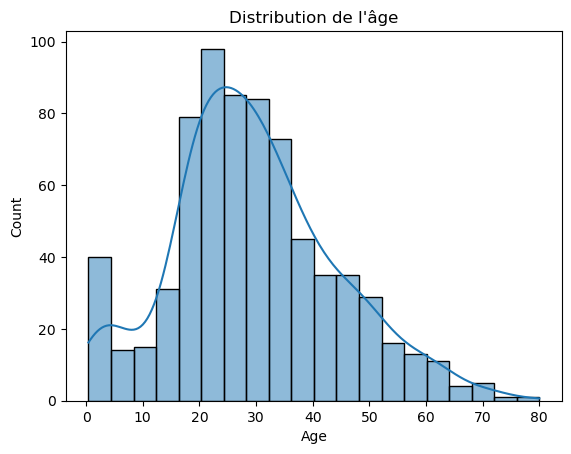

In [9]:
sns.histplot(titanic['Age'], kde=True)
plt.title('Distribution de l\'âge')

###### Distribution des tarifs

Text(0.5, 1.0, 'Distribution des tarifs')

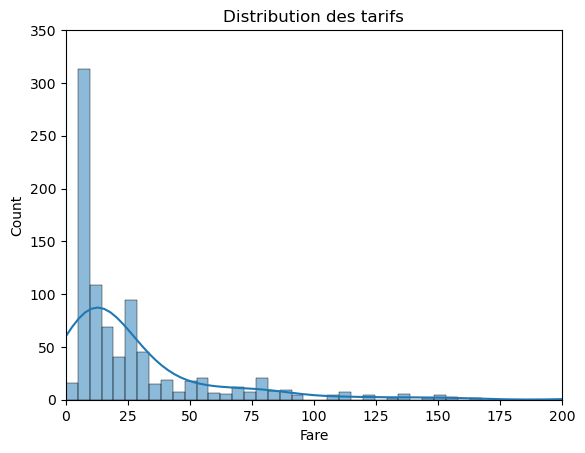

In [177]:
sns.histplot(titanic['Fare'], kde=True)
plt.xlim(0,200)
plt.ylim(0,350)
plt.title('Distribution des tarifs')

##### Interprétation
Le graphique présenté montre la distribution des tarifs payés par les passagers du Titanic. Il s'agit d'un histogramme avec une courbe de densité superposée.
L'histogramme de l'âge semble suivre une distribution normale.
Les tarifs n'ont pas une distribution normale

#### 2 Exploration visuelle des données
##### Distribution des survivants selon la classe du billet

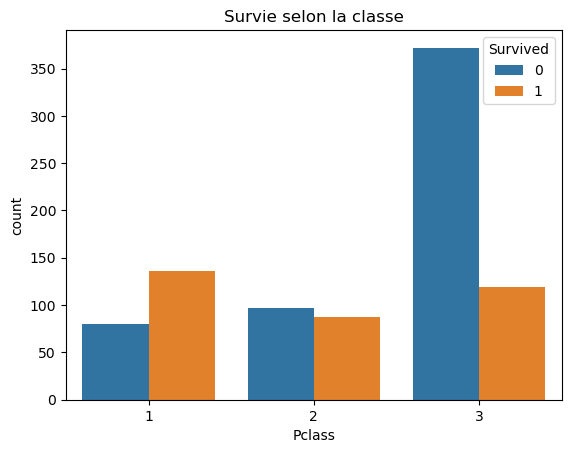

In [10]:
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title("Survie selon la classe")
plt.show()



#### Interprétation
Les passagers de 1ʳᵉ classe ont été favorisés tandis que les passagers de 3ᵉ classe ont été les plus touchés par le naufrage.

#### Distribution des survivants selon le sexe

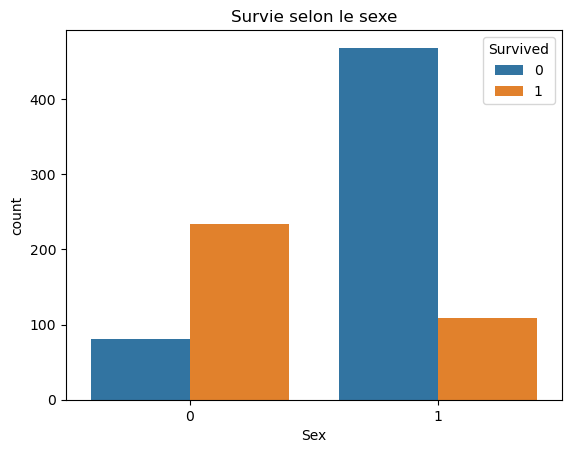

In [11]:
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title("Survie selon le sexe")
plt.show()


##### Interprétation
Les femmes ont été largement favorisées, probablement à cause de la règle « les femmes et les enfants d’abord » appliquée lors de l’évacuation du Titanic.

##### Distribution des survivants selon l'âge

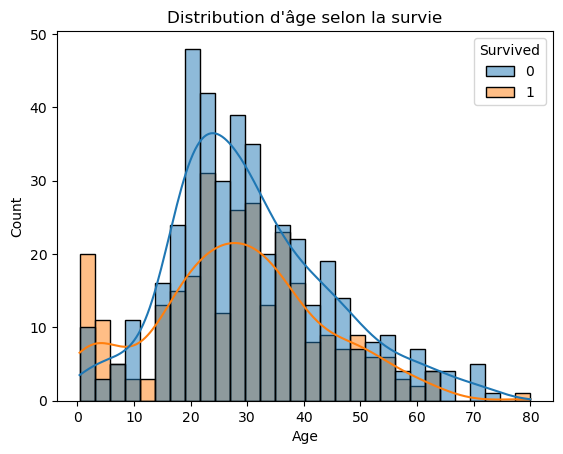

In [12]:
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Distribution d'âge selon la survie")
plt.show()

##### Interprétation
Le graphique présente la distribution des âges des passagers du Titanic selon leur statut de survie, en distinguant les individus décédés (Survived = 0, en bleu) des survivants (Survived = 1, en orange). Les données sont visualisées à l’aide d’histogrammes superposés accompagnés de courbes de densité pour chaque groupe.

##### Selection des variables 

In [13]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = titanic[features]
y = titanic['Survived'] # Target

##### b. Identifions les variables les plus corrélées à la survie

Text(0.5, 1.0, 'Matrice de corrélation')

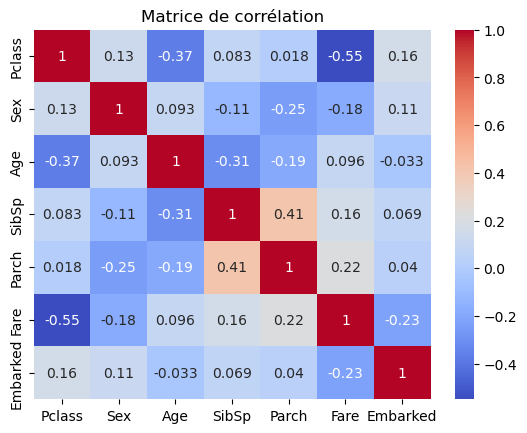

In [14]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')

##### Interprétation:
Le graphique présente une matrice de corrélation de Pearson entre différentes variables quantitatives et transformées du jeu de données Titanic. La matrice évalue l’intensité et le sens de la relation linéaire entre chaque paire de variables. Les coefficients de corrélation varient entre -1 (corrélation parfaitement négative) et +1 (corrélation parfaitement positive). Une échelle de couleur allant du bleu (corrélation négative) au rouge (corrélation positive) facilite la lecture visuelle.

#### 3. Construction d’un modèle prédictif
##### a. Séparons les données en un ensemble d'apprentissage et un ensemble de test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### b. Construire un modèle de classification (ex. : forêt aléatoire) \
##### construire le modèle 

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

##### c. Évaluer les performances du modèle\
##### Prédictions

In [17]:
y_pred = model.predict(X_test)

# Évaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.776536312849162
Precision: 0.7796610169491526
Recall: 0.6301369863013698
Confusion Matrix:
 [[93 13]
 [27 46]]


##### Interprétaton
L’exactitude globale est d’environ 77,65 %, ce qui signifie que près de 78 % des prédictions du modèle sont correctes, toutes classes confondues.

La précision indique que environ 77,97 % des individus que le modèle a prédits comme positifs (classe 1) sont effectivement positifs. C’est une mesure importante lorsque le coût des faux positifs est élevé, par exemple dans le cas d’un modèle de détection.

Le rappel signifie que 63,01 % des vrais positifs ont été correctement identifiés par le modèle. Il y a donc environ 37 % de faux négatifs, ce qui peut être problématique si l'on cherche à minimiser les omissions.

#### 4. Interprétation des résultats
#####  a. Identifions les variables les plus importantes dans la prédiction

In [18]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


    Feature  Importance
1       Sex    0.261534
2       Age    0.259528
5      Fare    0.256661
0    Pclass    0.094179
3     SibSp    0.048537
4     Parch    0.042416
6  Embarked    0.037145


#####  Interprétaton
Le tableau présente les poids relatifs (importances) attribués aux variables explicatives dans le cadre d’un modèle supervisé visant à prédire la survie des passagers du Titanic. Ces importances traduisent l’impact moyen de chaque variable sur les décisions du modèle, en fonction de la réduction d’impureté

##### b. Interprétons les résultats et proposer des améliorations possibles du modèle

Les variables les plus importantes sont le sexe l'âge et le tarif du billet (Fare).

Pour améliorer le modèle, on pourrait essayer d'autres algorithmes de classification, ajuster les hyperparamètres, ou ajouter des interactions entre les variables.

#### 5. Extension possible (optionnel) : Comparons les modèles régression logistique, arbre de decision

##### Imputation des valeurs manquantes

In [19]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

##### Régression logistique

In [20]:
log_model = LogisticRegression(random_state=1)
log_model.fit(X_train_imputed, y_train)
log_pred = log_model.predict(X_test_imputed)

##### Arbre de décision

In [21]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train_imputed, y_train)
tree_pred = tree_model.predict(X_test_imputed)

##### Évaluation des modèles : affichages des résultats

In [22]:
print('Logistic Regression Accuracy:', accuracy_score(y_test, log_pred))
print('Decision Tree Accuracy:', accuracy_score(y_test, tree_pred))

Logistic Regression Accuracy: 0.7988826815642458
Decision Tree Accuracy: 0.7541899441340782


##### Interprétation
Ce modèle atteint près de 80 % de bonnes prédictions, ce qui reflète une performance satisfaisante. La régression logistique, en tant que modèle linéaire, est bien adaptée à des problèmes de classification binaire lorsque les relations entre les variables sont relativement simples.

L’arbre de décision obtient une exactitude de 75,4 %, soit environ 4,5 points de moins que la régression logistique. Cela peut s’expliquer par une tendance au surapprentissage sur les données d'entraînement, fréquente dans les arbres si la profondeur n’est pas bien contrôlée.

##### b. Testons une validation croisée

In [23]:
# Importons le module cross_val_score de la bibliothèque scikit-learn
from sklearn.model_selection import cross_val_score

##### Validation croisée pour la forêt aléatoire

In [24]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-validated scores:', cv_scores)
print('Mean cross-validated score:', cv_scores.mean())


Cross-validated scores: [0.78212291 0.81460674 0.84831461 0.76404494 0.84269663]
Mean cross-validated score: 0.8103571652752495


##### Interprétation
Cette distribution est globalement homogène, avec des valeurs comprises entre 0,764 et 0,848. La variabilité est modérée, ce qui indique que le modèle est stable et peu sensible à la composition des sous-échantillons utilisés lors de la validation.

La moyenne des scores atteint 0,810, soit environ 81 % d’exactitude, ce qui confirme la bonne capacité généralisatrice du modèle. Cette performance est cohérente avec les résultats obtenus précédemment sur l’échantillon test.